In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Generate single molecule spectra for model training

In [2]:
k = np.arange(900, 1800, 5)

In [3]:
a=[]

for i in range(100):
    a.append( norm.pdf( k, loc=1000+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*(1+(np.random.rand()-0.5)*2*0.1) ) 

A = pd.DataFrame(np.column_stack((k, *a)))

In [4]:
b=[]

for i in range(100):
    b.append( norm.pdf( k, loc=1400+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*(2+(np.random.rand()-0.5)*2*0.1) ) 

B = pd.DataFrame(np.column_stack((k, *b)))

In [5]:
c=[]

for i in range(100):
    c.append( norm.pdf( k, loc=1700+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*(3+(np.random.rand()-0.5)*2*0.1) ) 

C = pd.DataFrame(np.column_stack((k, *c)))

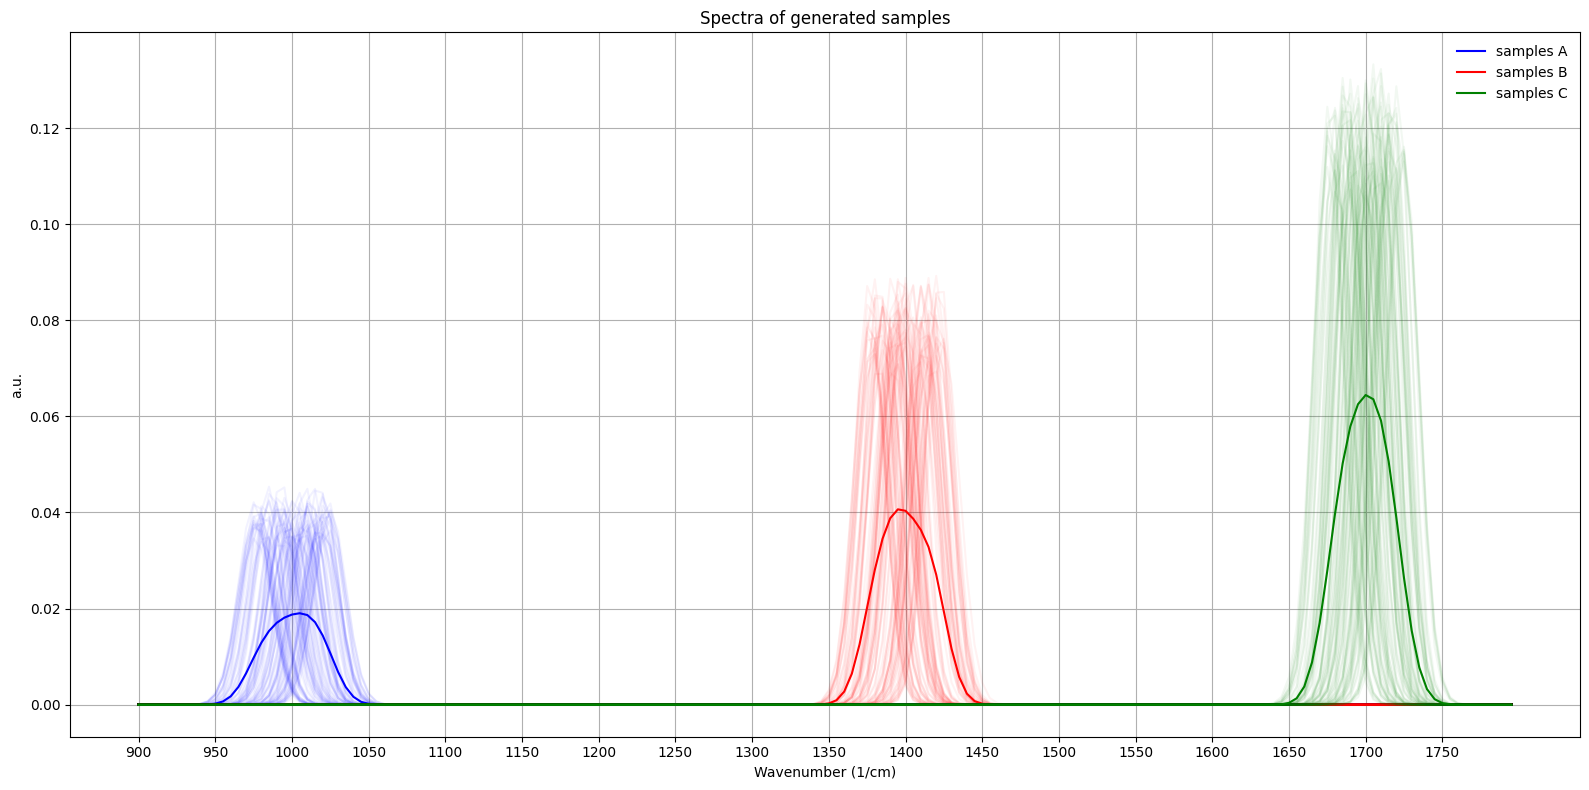

In [6]:
fig, ax = plt.subplots(figsize=[16, 8])


sample_measurement = []
A_plot = pd.melt(A, [0])
for sample, measurement in A_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="blue")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="blue", label="samples A", legend=True
)
###
sample_measurement = []
B_plot = pd.melt(B, [0])
for sample, measurement in B_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="red")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="red", label="samples B", legend=True
)
###
sample_measurement = []
C_plot = pd.melt(C, [0])
for sample, measurement in C_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="green")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="green", label="samples C", legend=True
)

ax.grid()

ax.set_ylabel("a.u.")
ax.set_title("Spectra of generated samples")
ax.set_xlabel("Wavenumber (1/cm)")
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()

In [7]:
A = A.set_index([0])
A.index.names = ['Wavenumbers']
A.columns = ['A_'+str(col) for col in A.columns]

B = B.set_index([0])
B.index.names = ['Wavenumbers']
B.columns = ['B_'+str(col) for col in B.columns]

C = C.set_index([0])
C.index.names = ['Wavenumbers']
C.columns = ['C_'+str(col) for col in C.columns]

df0 = pd.concat([A,B,C], axis=1)

In [8]:
df0

,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,...,C_91,C_92,C_93,C_94,C_95,C_96,C_97,C_98,C_99,C_100
Wavenumbers,,,,,,,,,,,,,,,,,,,,,
900.0,7.993730e-32,1.158975e-15,2.009023e-20,9.943996e-21,5.415407e-20,1.287860e-24,1.347019e-22,1.080683e-20,6.687937e-33,8.794350e-26,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
905.0,3.794714e-29,5.948767e-14,1.506528e-18,7.029130e-19,5.986086e-18,1.393497e-22,1.075076e-20,7.552223e-19,1.921583e-30,1.291087e-23,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
910.0,1.346471e-26,2.339894e-12,8.944462e-17,3.973685e-17,4.975072e-16,1.207066e-20,6.925997e-19,4.225074e-17,4.362339e-28,1.491877e-21,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
915.0,3.571114e-24,7.053131e-11,4.204518e-15,1.796539e-15,3.108853e-14,8.370338e-19,3.601665e-17,1.892244e-15,7.824791e-26,1.356863e-19,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
920.0,7.079436e-22,1.629237e-09,1.564815e-13,6.495777e-14,1.460648e-12,4.646675e-17,1.511827e-15,6.784270e-14,1.108968e-23,9.713243e-18,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.521371e-12,1.376077e-18,2.965679e-15,1.035627e-09,6.309514e-09,2.351434e-17,3.956696e-17,9.132877e-13,5.901533e-10,1.649451e-10
1780.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.573292e-14,1.728253e-20,7.203588e-17,5.211700e-11,2.509109e-10,2.407419e-19,5.439701e-19,2.369600e-14,3.122626e-11,6.661123e-12
1785.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,6.133650e-16,1.719334e-22,1.419807e-18,2.096593e-12,7.522827e-12,1.875934e-21,5.861390e-21,4.818536e-16,1.338271e-12,2.126960e-13


Generate mixed molecule spectra for testing the model

In [9]:
F=[]
abc=[]

for i in range(100):
    Fa=(1+(np.random.rand()-0.5)*2*1)
    Fb=(2+(np.random.rand()-0.5)*2*2)
    Fc=(3+(np.random.rand()-0.5)*2*3)

    

    abc.append( norm.pdf( k, loc=1000+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*Fa + \
                norm.pdf( k, loc=1400+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*Fb + \
                norm.pdf( k, loc=1700+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*Fc)

    F.append([Fa/1.,Fb/2.,Fc/3.])
    
    

In [10]:
ABC = pd.DataFrame(np.column_stack((k, *abc))).set_index([0])
ABC.index.names = ['Wavenumbers']
ABC.columns = ['ABC_'+str(col) for col in ABC.columns]

In [11]:
ABC

,ABC_1,ABC_2,ABC_3,ABC_4,ABC_5,ABC_6,ABC_7,ABC_8,ABC_9,ABC_10,...,ABC_91,ABC_92,ABC_93,ABC_94,ABC_95,ABC_96,ABC_97,ABC_98,ABC_99,ABC_100
Wavenumbers,,,,,,,,,,,,,,,,,,,,,
900.0,4.265347e-22,3.318160e-22,3.453454e-20,3.164036e-34,2.733382e-16,2.656767e-19,1.733699e-22,1.745406e-32,9.095825e-18,1.769481e-35,...,1.003432e-27,1.137183e-30,2.471870e-15,7.117722e-25,3.274278e-14,2.782007e-23,1.307783e-15,6.001316e-28,9.790541e-22,1.051588e-13
905.0,6.678679e-20,3.267012e-20,2.241792e-18,1.855791e-31,1.507928e-14,1.806777e-17,1.642288e-20,8.598222e-30,6.123378e-16,9.011544e-33,...,1.937787e-25,2.481974e-28,8.505415e-14,1.269532e-22,8.811040e-13,4.260470e-21,6.367925e-14,7.529353e-26,1.156960e-19,3.356440e-12
910.0,7.743628e-18,2.526658e-18,1.170216e-16,8.176878e-29,6.383129e-13,9.622080e-16,1.221497e-18,3.171133e-27,3.165338e-14,3.533434e-30,...,2.898981e-23,4.293998e-26,2.344118e-12,1.720101e-20,1.920696e-11,4.972880e-19,2.393769e-12,7.514514e-24,1.047875e-17,8.439742e-11
915.0,6.648384e-16,1.534915e-16,4.912086e-15,2.706557e-26,2.073288e-11,4.012792e-14,7.133505e-17,8.756166e-25,1.256403e-12,1.066693e-27,...,3.359746e-21,5.888764e-24,5.174610e-11,1.770402e-18,3.391638e-10,4.423945e-17,6.946861e-11,5.965902e-22,7.274105e-16,1.671847e-09
920.0,4.226738e-14,7.324276e-15,1.658040e-13,6.730043e-24,5.167237e-10,1.310501e-12,3.271006e-15,1.810119e-22,3.829288e-11,2.479283e-25,...,3.016400e-19,6.401535e-22,9.149341e-10,1.384195e-16,4.851547e-09,2.999595e-15,1.556385e-09,3.767760e-20,3.870161e-14,2.609043e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775.0,6.181083e-08,8.733365e-12,3.258567e-22,1.351275e-14,2.729728e-23,6.506925e-18,1.051539e-18,4.659365e-21,9.331581e-07,1.496338e-11,...,1.507854e-24,2.121504e-24,2.299599e-14,2.468214e-12,1.154175e-10,4.802632e-12,3.882998e-07,8.347757e-09,8.459412e-07,1.203440e-10
1780.0,4.324483e-09,2.911186e-13,1.707576e-24,2.129500e-16,1.030410e-25,9.785447e-20,1.319816e-20,3.647781e-23,8.868160e-08,3.599331e-13,...,5.529686e-27,6.528802e-27,3.198687e-16,4.924682e-14,4.389765e-12,1.201604e-13,3.642028e-08,5.419992e-10,6.832735e-08,5.271523e-12
1785.0,2.413469e-10,7.709131e-15,6.807240e-27,2.576232e-18,2.886468e-28,1.178340e-21,1.306612e-22,2.203279e-25,6.796726e-09,6.426096e-15,...,1.527704e-29,1.486917e-29,3.328431e-18,7.353613e-16,1.323558e-13,2.324763e-15,2.744407e-09,2.855623e-11,4.378881e-09,1.856504e-13


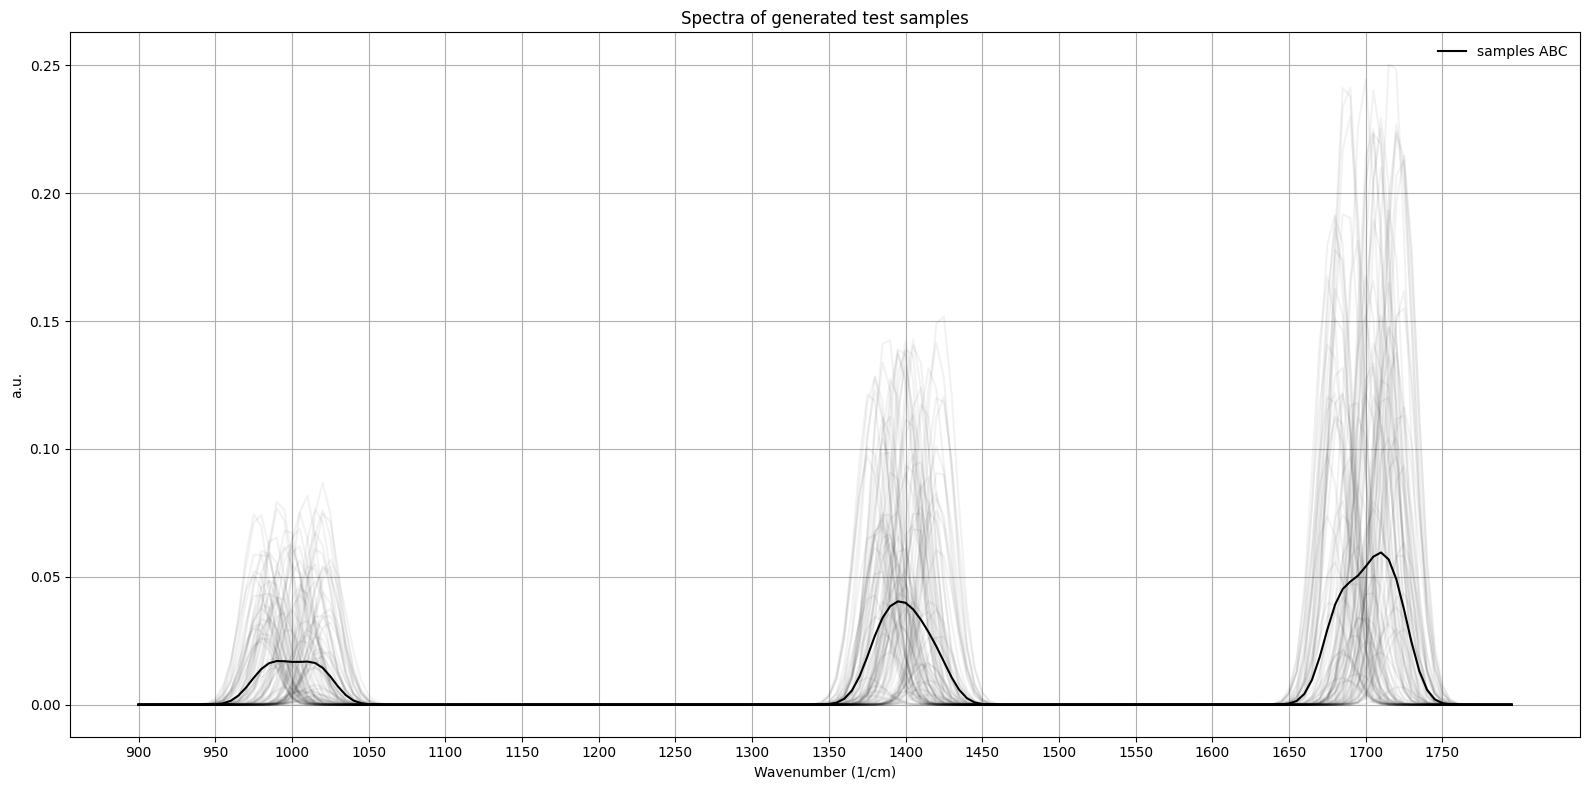

In [12]:
fig, ax = plt.subplots(figsize=[16, 8])


sample_measurement = []
ABC_plot = pd.melt(ABC.reset_index(), ['Wavenumbers'])
for sample, measurement in ABC_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="black")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="black", label="samples ABC", legend=True
)

ax.grid()

ax.set_ylabel("a.u.")
ax.set_title("Spectra of generated test samples")
ax.set_xlabel("Wavenumber (1/cm)")
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()

In [13]:
df1=ABC.copy()

In [14]:
labels = pd.DataFrame(F).rename(columns={0:'A', 1:'B', 2:'C'})
labels.index = ['ABC_'+str(row+1) for row in labels.index]
labels

,A,B,C
ABC_1,0.363696,0.539172,0.925084
ABC_2,0.762573,1.777166,1.173476
ABC_3,1.708016,0.724004,1.542220
ABC_4,1.299196,1.549437,1.998106
ABC_5,0.783926,0.476965,0.613924
...,...,...,...
ABC_96,1.489863,0.804917,1.985950
ABC_97,1.084835,1.874447,0.392567
ABC_98,0.002612,0.923935,1.181641
ABC_99,1.042743,0.596668,1.878933


Now we have:

+ the single molecule spectra `df0` 
+ the mixed molecule spectra `df1`
+ `labels` with the mixing ratios of the mixed molecule spectra



Next step: Find an ML model that determines the right molecular mixing ratios from the mixed molecule spectra. 